# Walmart Store Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('./data/raw/train.csv')
features = pd.read_csv('./data/raw/features.csv')
stores = pd.read_csv('./data/raw/stores.csv')
test = pd.read_csv('./data/raw/test.csv')

In [3]:
stores.head()   

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
print(train.shape, stores.shape, features.shape,test.shape)

(421570, 5) (45, 3) (8190, 12) (115064, 4)


### Merge Dataset

In [8]:
#Perfect merge
# Merge train and features on 'Store' and 'Date'
df_train = pd.merge(train,features, how='inner', on=['Store', 'Date', 'IsHoliday'])
df_train = pd.merge(df_train, stores, how='left', on='Store')
df_train.head()

df_test = pd.merge(test,features, how='inner', on=['Store', 'Date', 'IsHoliday'])
df_test = pd.merge(df_test, stores, how='left', on='Store')


In [9]:
df_train['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [10]:
print ("train data null values")
print(df_train.isnull().sum())
print("----------------------------------------------------")
print ("test data null values")
print (df_test.isnull().sum())

train data null values
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64
----------------------------------------------------
test data null values
Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64


In [11]:
df_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [12]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


### Data Cleaning

In [13]:
# Drop MarkDown columns
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df_train = df_train.drop(columns=markdown_cols)
df_test = df_test.drop(columns=markdown_cols)

In [14]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315


In [15]:
print ("train data null values")
print(df_train.isnull().sum())
print("----------------------------------------------------")
print ("test data null values")
print (df_test.isnull().sum())

train data null values
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64
----------------------------------------------------
test data null values
Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64


Change Datatype for Date from Object to Datetime

In [16]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [17]:
print("Train Data Information")
df_train.info()
print('-----------------------------------------------------------------')
print("Test Data Information")
df_test.info()

Train Data Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Type          421570 non-null  object        
 10  Size          421570 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 35.8+ MB
-----------------------------------------------------------------
Test Data Information
<class 'pandas.core.fram

In [18]:
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Week'] = df_train['Date'].dt.isocalendar().week

df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Week'] = df_test['Date'].dt.isocalendar().week

In [19]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5


In [20]:
df_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,2012,11,44
1,1,2,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,2012,11,44
2,1,3,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,2012,11,44
3,1,4,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,2012,11,44
4,1,5,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,2012,11,44


### exploratory data analysis (EDA)

In [21]:
df_train.nlargest(10, "Weekly_Sales")

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,126.669267,9.003,B,126512,2010,11,47
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,140.421786,8.745,B,103681,2011,11,47
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,129.836400,7.874,B,126512,2011,11,47
333594,35,72,2010-11-26,627962.93,True,46.67,3.039,136.689571,8.763,B,103681,2010,11,47
131088,14,72,2010-11-26,474330.10,True,46.15,3.039,182.783277,8.724,A,200898,2010,11,47
190370,20,72,2010-11-26,422306.25,True,46.66,3.039,204.962100,7.484,A,203742,2010,11,47
259799,27,72,2010-11-26,420586.57,True,46.67,3.186,136.689571,8.021,A,204184,2010,11,47
90886,10,7,2010-12-24,406988.63,False,57.06,3.236,126.983581,9.003,B,126512,2010,12,51
90936,10,72,2010-12-24,404245.03,False,57.06,3.236,126.983581,9.003,B,126512,2010,12,51
210037,22,72,2010-11-26,393705.20,True,44.61,3.070,136.689571,8.572,B,119557,2010,11,47


In [22]:
df_train.nsmallest(10, "Weekly_Sales")

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
269456,28,6,2010-10-08,-4988.94,False,71.82,3.013,126.279167,14.313,A,206302,2010,10,40
336241,35,47,2011-09-02,-3924.00,False,71.44,3.703,140.196985,8.684,B,103681,2011,9,35
412178,45,47,2010-02-26,-1750.00,False,34.89,2.754,182.077469,8.992,B,118221,2010,2,8
155177,16,47,2012-03-09,-1699.00,False,28.16,3.286,196.963160,6.162,B,57197,2012,3,10
271178,28,32,2011-03-25,-1321.48,False,54.40,3.909,128.616064,14.021,A,206302,2011,3,12
12072,2,47,2010-07-30,-1098.00,False,83.49,2.640,211.026468,8.099,A,202307,2010,7,30
12854,2,47,2010-10-15,-1098.00,False,65.80,2.720,211.471329,8.163,A,202307,2010,10,41
13210,2,47,2010-11-19,-1098.00,False,50.81,2.771,211.547030,8.163,A,202307,2010,11,46
25918,3,32,2011-09-30,-1008.96,False,82.58,3.355,220.085696,7.567,B,37392,2011,9,39
31867,4,47,2010-09-17,-898.00,False,64.91,2.594,126.145467,7.372,A,205863,2010,9,37


<AxesSubplot:>

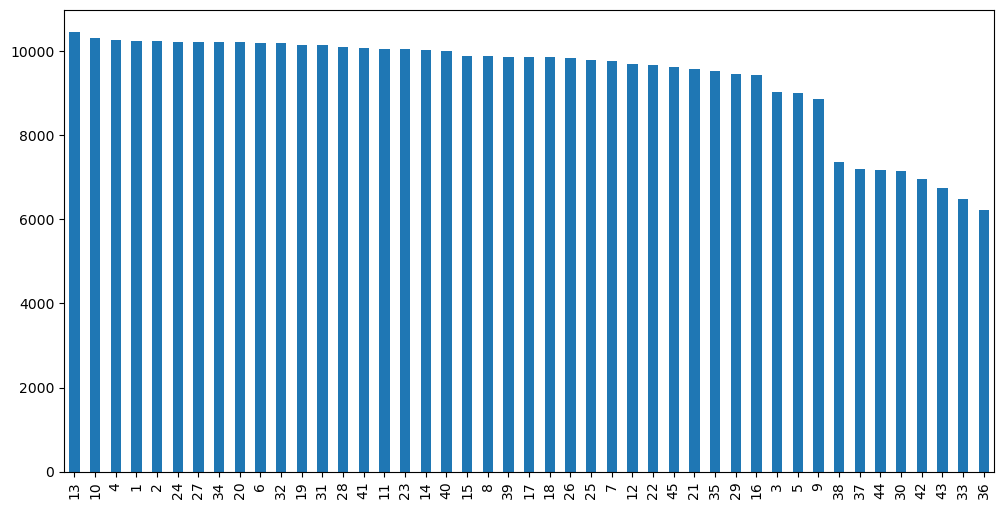

In [23]:
df_train['Store'].value_counts().plot(kind='bar', figsize=(12, 6))

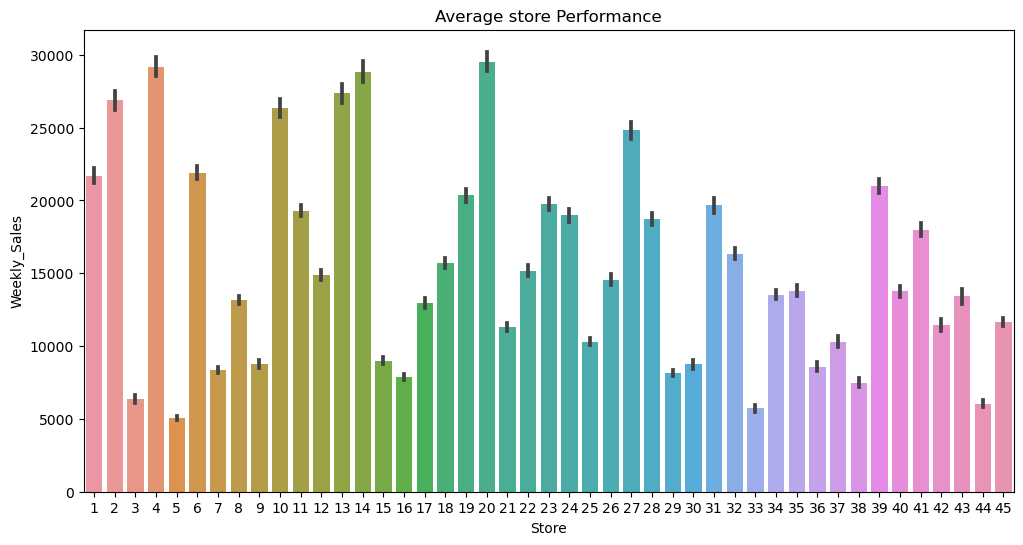

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x='Store', y='Weekly_Sales', data=df_train )
plt.title('Average store Performance')
plt.show()

#### Target Variable Analysis

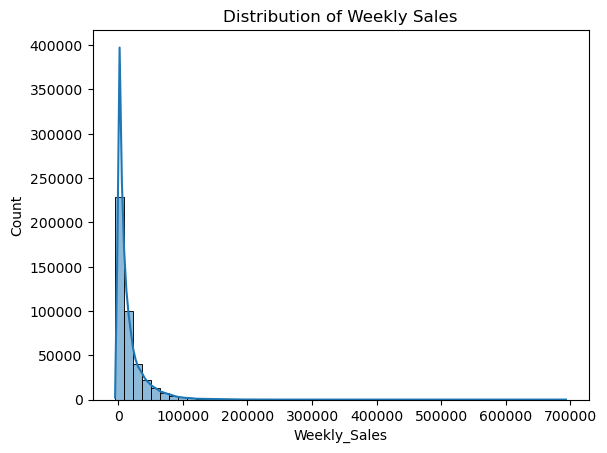

In [25]:
sns.histplot(df_train['Weekly_Sales'], bins=50 ,kde=True)
plt.title('Distribution of Weekly Sales')
plt.show()

#### Time Series Analysis

##### Overall Sales Trend

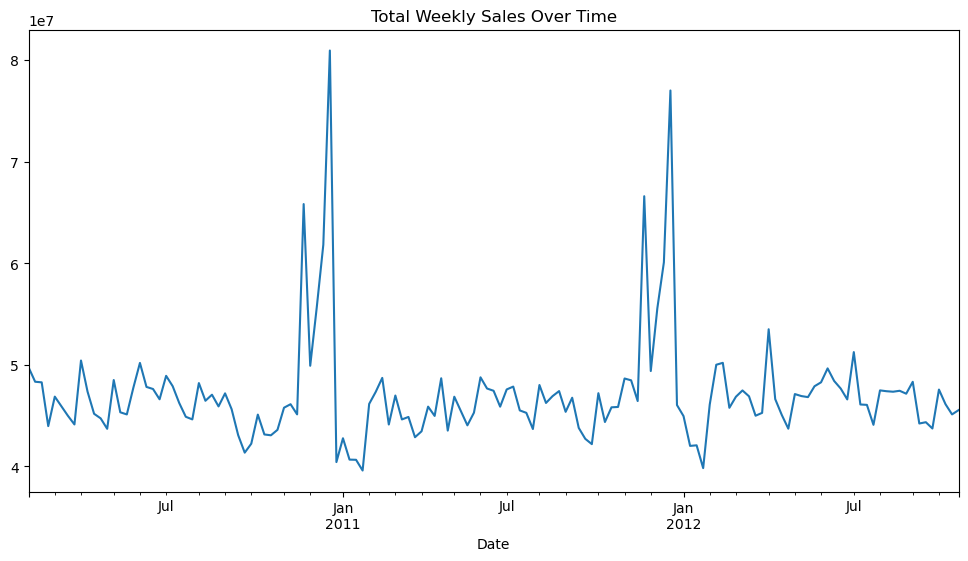

In [26]:
sales_trend = df_train.groupby('Date')['Weekly_Sales'].sum()
sales_trend.plot(figsize=(12, 6), title='Total Weekly Sales Over Time')
plt.show()

Weekly Sales vs Type

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

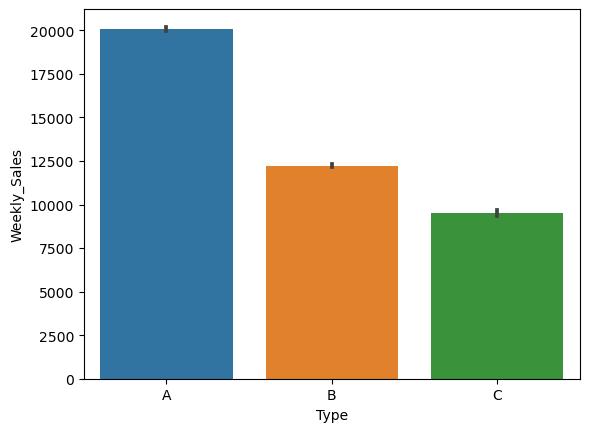

In [27]:
sns.barplot(x='Type', y='Weekly_Sales', data=df_train)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Type          421570 non-null  object        
 10  Size          421570 non-null  int64         
 11  Year          421570 non-null  int64         
 12  Month         421570 non-null  int64         
 13  Week          421570 non-null  UInt32        
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(5), int64(5), obje

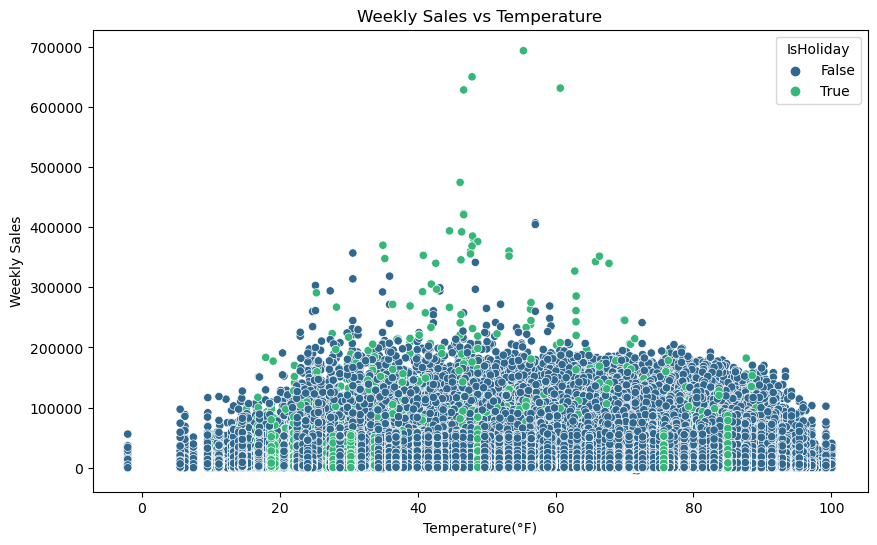

In [29]:
#Relationship between Weekly Sales and Temperature
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_train, x='Temperature', y='Weekly_Sales', hue='IsHoliday', palette='viridis')
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature(°F)')
plt.ylabel('Weekly Sales')
plt.show()

As the visualization above , It shown that holiday play big role in how Walmart performance sales will be 

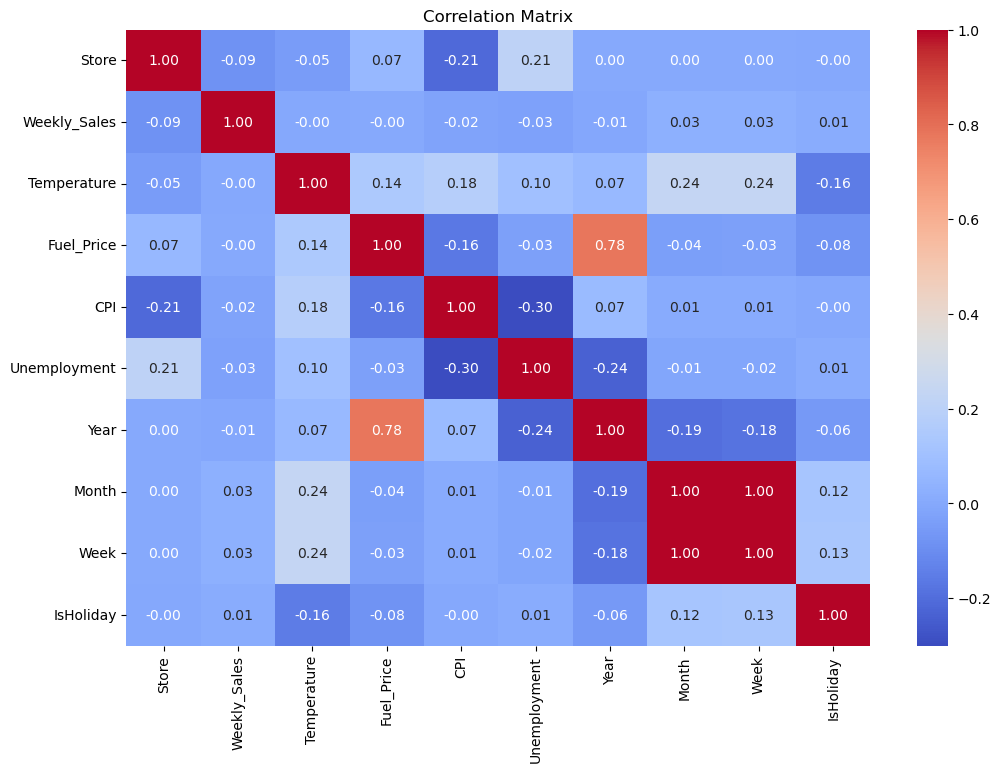

In [30]:
# 3. Correlation matrix to see relationships between numerical features
plt.figure(figsize=(12,8))
corr_matrix = df_train[['Store','Weekly_Sales', 'Temperature', 'Fuel_Price',  'CPI', 'Unemployment','Year','Month','Week','IsHoliday']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


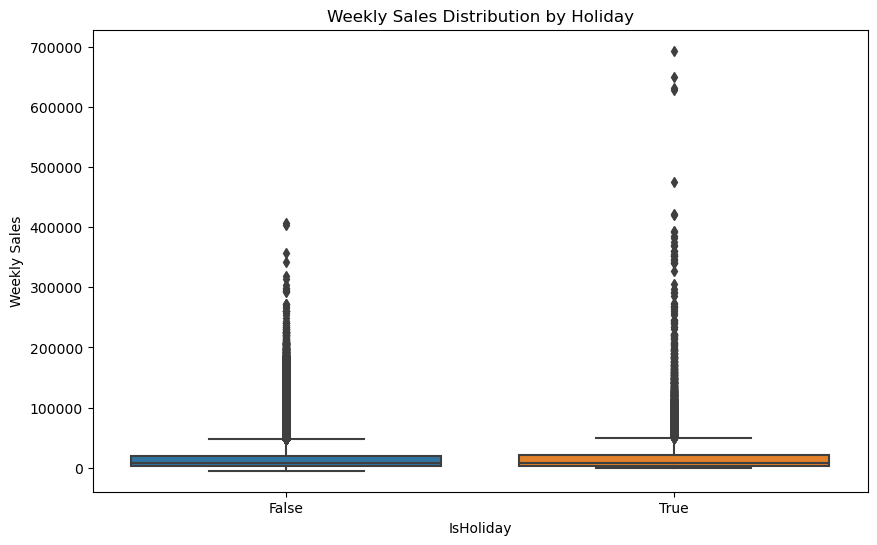

In [31]:
# 4. Visualize the effect of holidays on weekly sales
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train, x='IsHoliday', y='Weekly_Sales')
plt.title('Weekly Sales Distribution by Holiday')
plt.xlabel('IsHoliday')
plt.ylabel('Weekly Sales')
plt.show()

Change Categorical columns with numerical

In [32]:
#Change categorical columns to numerical type

# Train data
label_encoder = LabelEncoder()
df_train['IsHoliday'] = label_encoder.fit_transform(df_train['IsHoliday'])
df_train['Type'] = label_encoder.fit_transform(df_train['Type'])

# Train data encoded
print('Train Data Encoded')
print(df_train.head())#[['Type', 'IsHoliday']].head())

print('-----------------------------------------------------------------')
print('Test Data Encoded')
# Test data
label_encoder = LabelEncoder()
df_test['IsHoliday'] = label_encoder.fit_transform(df_test['IsHoliday'])
df_test['Type'] = label_encoder.fit_transform(df_test['Type'])

# Test data encoded
print(df_test.head())#[['Type', 'IsHoliday']].head())

Train Data Encoded
   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50          0        42.31       2.572   
1      1     2 2010-02-05      50605.27          0        42.31       2.572   
2      1     3 2010-02-05      13740.12          0        42.31       2.572   
3      1     4 2010-02-05      39954.04          0        42.31       2.572   
4      1     5 2010-02-05      32229.38          0        42.31       2.572   

          CPI  Unemployment  Type    Size  Year  Month  Week  
0  211.096358         8.106     0  151315  2010      2     5  
1  211.096358         8.106     0  151315  2010      2     5  
2  211.096358         8.106     0  151315  2010      2     5  
3  211.096358         8.106     0  151315  2010      2     5  
4  211.096358         8.106     0  151315  2010      2     5  
-----------------------------------------------------------------
Test Data Encoded
   Store  Dept       Date  IsHoliday  Temper

In [33]:
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
dtype: int64

In [34]:
df_test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
CPI             38162
Unemployment    38162
Type                0
Size                0
Year                0
Month               0
Week                0
dtype: int64

In [35]:
features_drop=['Unemployment','CPI']
df_train=df_train.drop(features_drop, axis=1)
df_test=df_test.drop(features_drop, axis=1)

In [36]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0,151315,2010,2,5
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0,151315,2010,2,5
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0,151315,2010,2,5
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0,151315,2010,2,5
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0,151315,2010,2,5


In [37]:
df_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,Type,Size,Year,Month,Week
0,1,1,2012-11-02,0,55.32,3.386,0,151315,2012,11,44
1,1,2,2012-11-02,0,55.32,3.386,0,151315,2012,11,44
2,1,3,2012-11-02,0,55.32,3.386,0,151315,2012,11,44
3,1,4,2012-11-02,0,55.32,3.386,0,151315,2012,11,44
4,1,5,2012-11-02,0,55.32,3.386,0,151315,2012,11,44


In [38]:
df_train.isnull().sum()  

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
Type            0
Size            0
Year            0
Month           0
Week            0
dtype: int64

In [39]:
df_train.to_csv('./data/processed/train.csv', index=False)
df_test.to_csv('./data/processed/test.csv', index=False)

### Data Split and Data Predict

In [40]:
X = df_train.drop(['Weekly_Sales','Date'], axis=1)
y= df_train['Weekly_Sales']
X_train, X_test ,y_train ,y_test =train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_train shape: (337256, 10)
y_train shape: (337256,)
X_test shape: (84314, 10)
y_test shape: (84314,)


Now we want to have preview with the X train data

In [41]:
X_train.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Type,Size,Year,Month,Week
138466,15,96,0,31.79,2.919,1,123737,2010,3,9
289214,30,10,0,59.87,3.045,2,42988,2011,2,7
52351,6,10,0,46.20,3.016,0,202505,2011,1,3
203504,21,27,0,65.16,3.353,1,140167,2011,10,42
233606,24,25,1,41.83,3.689,0,203819,2011,11,47


In [42]:
y_train

138466     1592.31
289214      161.71
52351     36427.26
203504     1792.48
233606    14598.98
            ...   
259178    39587.07
365838    11450.68
131932    59241.93
146867    36466.47
121958    12486.48
Name: Weekly_Sales, Length: 337256, dtype: float64

Now we want to have preview with the X test data

As you can see , now the both of train and test data have been splitted nicely

### Use Min Max Scaler

In [43]:
from sklearn.preprocessing import MinMaxScaler
#It transforms data by scaling features to a given range.
#It scales the values to a specific value range without changing the shape of the original distribution
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)

### Model Testing

##### Linear Regression

Training Score: 8.56%
Linear Regression Test Evaluation:
  - Mean Absolute Error (MAE): 14611.72
  - Mean Squared Error (MSE): 480395245.60
  - R² Score: 0.09


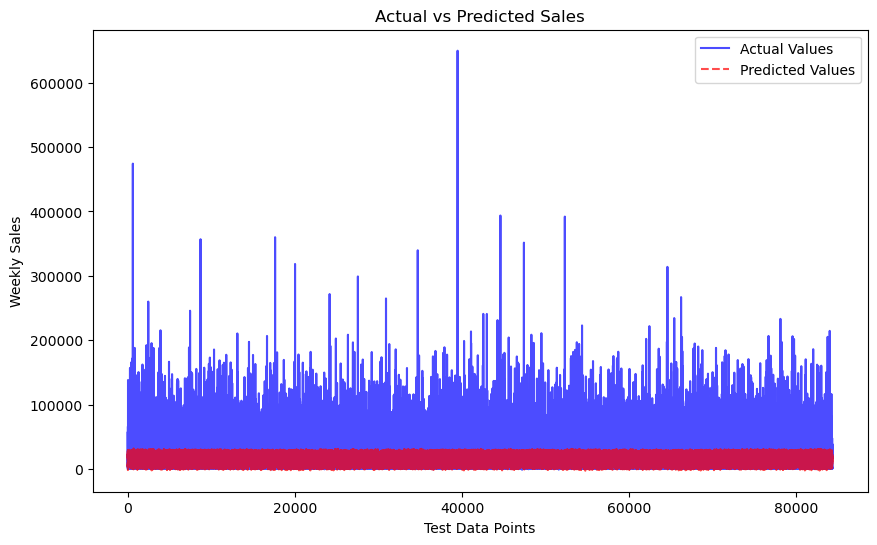

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#train the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

#Evaluate the model's performance on training data
lrtrain_score = linear_regression.score(X_train, y_train)
print(f'Training Score: {lrtrain_score * 100:.2f}%')

#  predictions on the test data
y_predLR = linear_regression.predict(X_test)

#Calculate evaluation metrics on the test data
lrmae = mean_absolute_error(y_test, y_predLR)
lrmse = mean_squared_error(y_test, y_predLR)
lrr2 = r2_score(y_test, y_predLR)

#Print the evaluation metrics for test data
print(f'Linear Regression Test Evaluation:')
print(f'  - Mean Absolute Error (MAE): {lrmae:.2f}')
print(f'  - Mean Squared Error (MSE): {lrmse:.2f}')
print(f'  - R² Score: {lrr2:.2f}')

#Visualize the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', linestyle='-', alpha=0.7)
plt.plot(y_predLR, label='Predicted Values', color='red', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Data Points')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


##### Random Forest

Training Score: 99.63%
Linear Regression Test Evaluation:
  - Mean Absolute Error (MAE): 1416.26
  - Mean Squared Error (MSE): 13046734.97
  - R² Score: 0.98


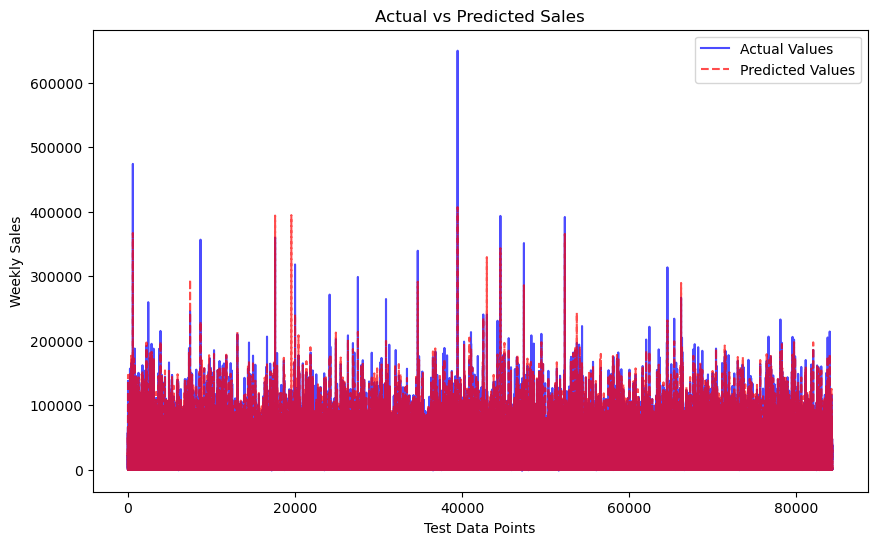

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100)
model=rf.fit(X_train, y_train)


#Evaluate the model's performance on training data
rftrain_score = model.score(X_train, y_train)
print(f'Training Score: {rftrain_score * 100:.2f}%')

y_predRF = rf.predict(X_test)

#Calculate evaluation metrics on the test data
rfmae = mean_absolute_error(y_test, y_predRF)
rfmse = mean_squared_error(y_test, y_predRF)
rfr2 = r2_score(y_test, y_predRF)

#Print the evaluation metrics for test data
print(f'Linear Regression Test Evaluation:')
print(f'  - Mean Absolute Error (MAE): {rfmae:.2f}')
print(f'  - Mean Squared Error (MSE): {rfmse:.2f}')
print(f'  - R² Score: {rfr2:.2f}')

#Visualize the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', linestyle='-', alpha=0.7)
plt.plot(y_predRF, label='Predicted Values', color='red', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Data Points')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


##### Gradient Boost

Training Score: 29.94%
Linear Regression Test Evaluation:
  - Mean Absolute Error (MAE): 1416.26
  - Mean Squared Error (MSE): 13046734.97
  - R² Score: 0.98


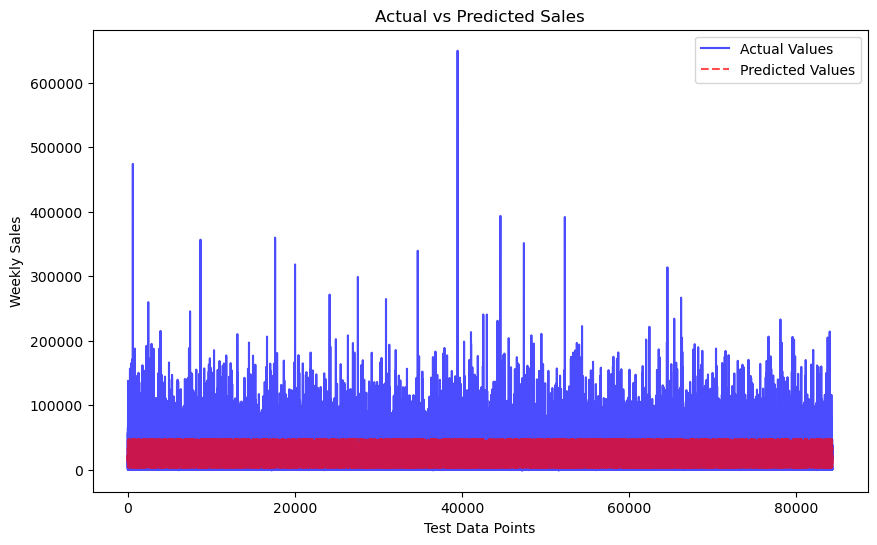

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1)
gbr.fit(X_train, y_train)

#Evaluate the model's performance on training data
gbrtrain_score = gbr.score(X_train, y_train)
print(f'Training Score: {gbrtrain_score * 100:.2f}%')

y_predGBR = gbr.predict(X_test)

#Calculate evaluation metrics on the test data
gbrmae = mean_absolute_error(y_test, y_predRF)
gbrmse = mean_squared_error(y_test, y_predRF)
gbrr2 = r2_score(y_test, y_predRF)

#Print the evaluation metrics for test data
print(f'Linear Regression Test Evaluation:')
print(f'  - Mean Absolute Error (MAE): {gbrmae:.2f}')
print(f'  - Mean Squared Error (MSE): {gbrmse:.2f}')
print(f'  - R² Score: {gbrr2:.2f}')

#Visualize the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', linestyle='-', alpha=0.7)
plt.plot(y_predGBR, label='Predicted Values', color='red', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Data Points')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()



##### Ridge and Laasso

Ridge Regression Evaluation:
Training Score: 8.56%
  - Mean Absolute Error (MAE): 14611.70
  - Mean Squared Error (MSE): 480395630.99
  - R² Score: 0.09

Lasso Regression Evaluation:
Training Score: 8.55%
  - Mean Absolute Error (MAE): 14611.11
  - Mean Squared Error (MSE): 480418656.51
  - R² Score: 0.09


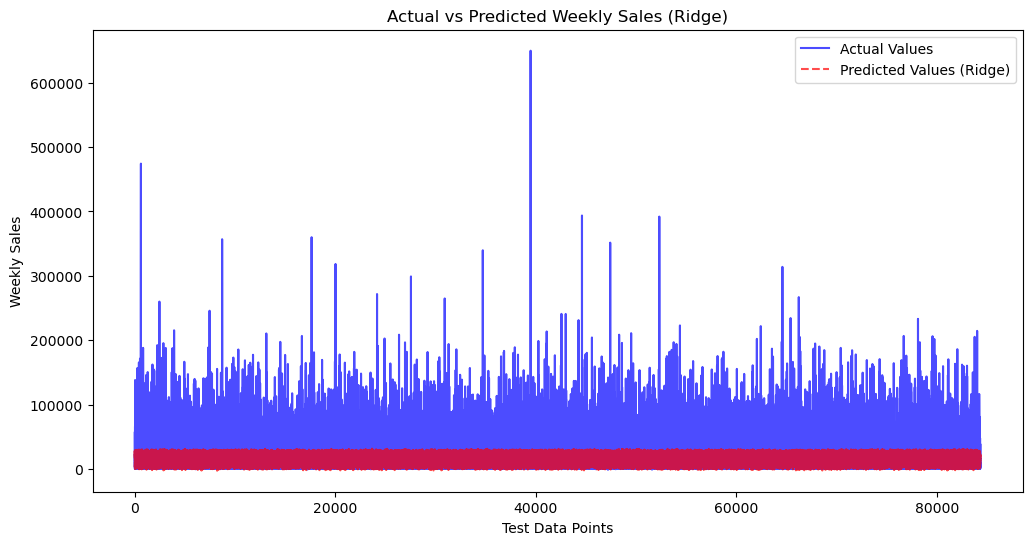

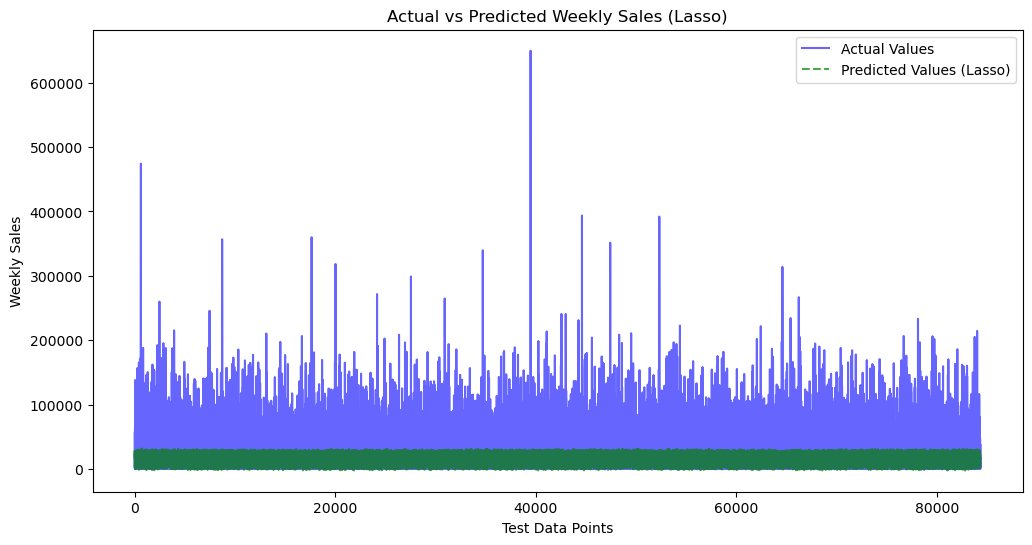

In [47]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize Ridge and Lasso regression models
ridge_model = Ridge()
lasso_model = Lasso()

# Fit the models on the training data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)


# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate evaluation metrics for Ridge regression
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Calculate evaluation metrics for Lasso regression
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

#Evaluate the model's performance on training data
ridge_train_score = ridge_model.score(X_train, y_train)
lasso_train_score = lasso_model.score(X_train, y_train)

# Print evaluation metrics
print("Ridge Regression Evaluation:")

print(f'Training Score: {ridge_train_score * 100:.2f}%')
print(f"  - Mean Absolute Error (MAE): {ridge_mae:.2f}")
print(f"  - Mean Squared Error (MSE): {ridge_mse:.2f}")
print(f"  - R² Score: {ridge_r2:.2f}")

print("\nLasso Regression Evaluation:")
print(f'Training Score: {lasso_train_score * 100:.2f}%')
print(f"  - Mean Absolute Error (MAE): {lasso_mae:.2f}")
print(f"  - Mean Squared Error (MSE): {lasso_mse:.2f}")
print(f"  - R² Score: {lasso_r2:.2f}")

# Visualize the comparison of actual vs predicted values for Ridge
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', linestyle='-', alpha=0.7)
plt.plot(y_pred_ridge, label='Predicted Values (Ridge)', color='red', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Weekly Sales (Ridge)')
plt.xlabel('Test Data Points')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Visualize the comparison of actual vs predicted values for Lasso
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', linestyle='-', alpha=0.6)
plt.plot(y_pred_lasso, label='Predicted Values (Lasso)', color='green', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Weekly Sales (Lasso)')
plt.xlabel('Test Data Points')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


##### Decision Tree

Training Score: 100.00%
Linear Regression Test Evaluation:
  - Mean Absolute Error (MAE): 1835.24
  - Mean Squared Error (MSE): 24197843.40
  - R² Score: 0.95


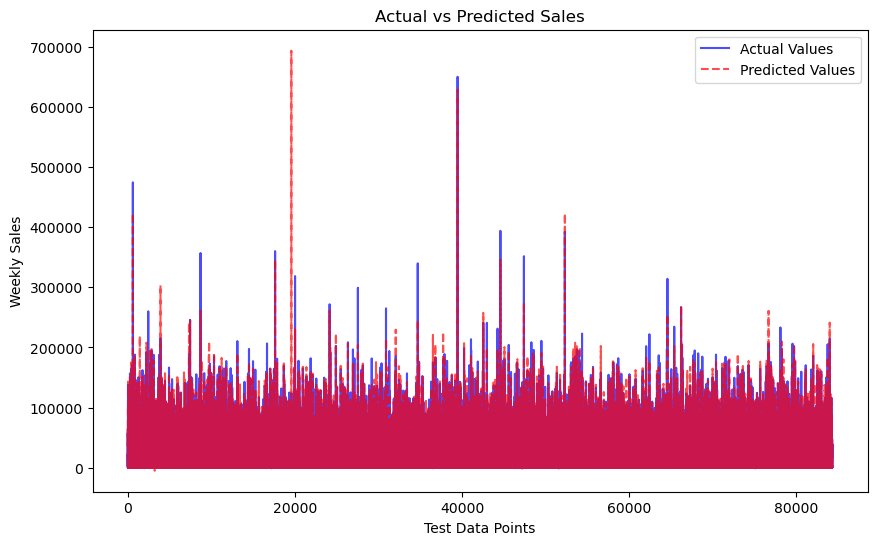

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)

#Evaluate the model's performance on training data
dttrain_score = dt.score(X_train, y_train)
print(f'Training Score: {dttrain_score * 100:.2f}%')

y_predDT = dt.predict(X_test)

#Calculate evaluation metrics on the test data
dtmae = mean_absolute_error(y_test, y_predDT)
dtmse = mean_squared_error(y_test, y_predDT)
dtr2 = r2_score(y_test, y_predDT)

#Print the evaluation metrics for test data
print(f'Linear Regression Test Evaluation:')
print(f'  - Mean Absolute Error (MAE): {dtmae:.2f}')
print(f'  - Mean Squared Error (MSE): {dtmse:.2f}')
print(f'  - R² Score: {dtr2:.2f}')

#Visualize the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', linestyle='-', alpha=0.7)
plt.plot(y_predDT, label='Predicted Values', color='red', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Data Points')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()



In [49]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Ridge', 'Lasso', 'Decision Tree'],
    'Score': [lrtrain_score, rftrain_score, gbrtrain_score, ridge_train_score, lasso_train_score, dttrain_score],
    'MAE': [lrmae, rfmae, gbrmae, ridge_mae, lasso_mae, dtmae],
    'MSE': [lrmse, rfmse, gbrmse, ridge_mse, lasso_mse, dtmse],
    'R2': [lrr2, rfr2, gbrr2, ridge_r2, lasso_r2, dtr2]
    })
    
    

models.sort_values(by='R2', ascending=False)

,Model,Score,MAE,MSE,R2
1,Random Forest,0.996318,1416.261789,1.304673e+07,0.975183
2,Gradient Boosting,0.299399,1416.261789,1.304673e+07,0.975183
5,Decision Tree,1.000000,1835.236817,2.419784e+07,0.953972
0,Linear Regression,0.085557,14611.716716,4.803952e+08,0.086223
3,Ridge,0.085557,14611.695332,4.803956e+08,0.086223
4,Lasso,0.085545,14611.105182,4.804187e+08,0.086179


### Prediction On Test Data By Utilizing the best model

RANDOM FOREST

In [50]:
#final on the test data
predtest = df_test.drop(['Date'], axis=1)
print("predtest shape: {}".format(predtest.shape))

predtest shape: (115064, 10)


In [51]:
predtest.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Type,Size,Year,Month,Week
0,1,1,0,55.32,3.386,0,151315,2012,11,44
1,1,2,0,55.32,3.386,0,151315,2012,11,44
2,1,3,0,55.32,3.386,0,151315,2012,11,44
3,1,4,0,55.32,3.386,0,151315,2012,11,44
4,1,5,0,55.32,3.386,0,151315,2012,11,44


In [52]:
predtest = scaler.transform(predtest)

In [53]:
prediction = model.predict(predtest)

In [54]:
#Format the predictions
df_test['Weekly_Sales'] = prediction
resultpred = df_test[['Store', 'Dept', 'Date','IsHoliday' ,'Weekly_Sales']]

In [55]:
resultpred.head()

,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,2012-11-02,0,35225.8028
1,1,2,2012-11-02,0,45470.8212
2,1,3,2012-11-02,0,9497.4461
3,1,4,2012-11-02,0,35418.8346
4,1,5,2012-11-02,0,29610.8978


In [56]:
resultpred.to_csv('./data/processed/finalprediction.csv', index=False) # Save the predictions to a CSV file

### Data Vasualization On Predicted Data

In [57]:
resultpred['Weekly_Sales'].describe()

count    115064.000000
mean      16561.094183
std       23835.335180
min        -425.091600
25%        2180.168550
50%        7776.785150
75%       20762.493025
max      536732.585500
Name: Weekly_Sales, dtype: float64

In [58]:
resultpred['Weekly_Sales']

0         35225.8028
1         45470.8212
2          9497.4461
3         35418.8346
4         29610.8978
             ...    
115059     3518.4004
115060     4134.2672
115061    53832.5851
115062     6602.4498
115063      686.3215
Name: Weekly_Sales, Length: 115064, dtype: float64

In [59]:
resultpred.nlargest(10, "Weekly_Sales")

,Store,Dept,Date,IsHoliday,Weekly_Sales
24163,10,72,2012-11-23,1,536732.5855
29684,12,72,2012-11-23,1,509568.5353
90300,35,72,2012-11-23,1,458247.8293
59360,23,72,2012-11-23,1,439288.9728
56735,22,72,2012-11-23,1,437915.4233
73034,28,72,2012-11-23,1,437633.8322
45850,18,72,2012-11-23,1,431094.1980
35153,14,72,2012-11-23,1,423625.8014
51356,20,72,2012-11-23,1,423617.0941
70246,27,72,2012-11-23,1,418787.8657


The top 10 largest weekly sales all occurred on the same date, which was November 23, 2012, coinciding with the Thanksgiving holiday.

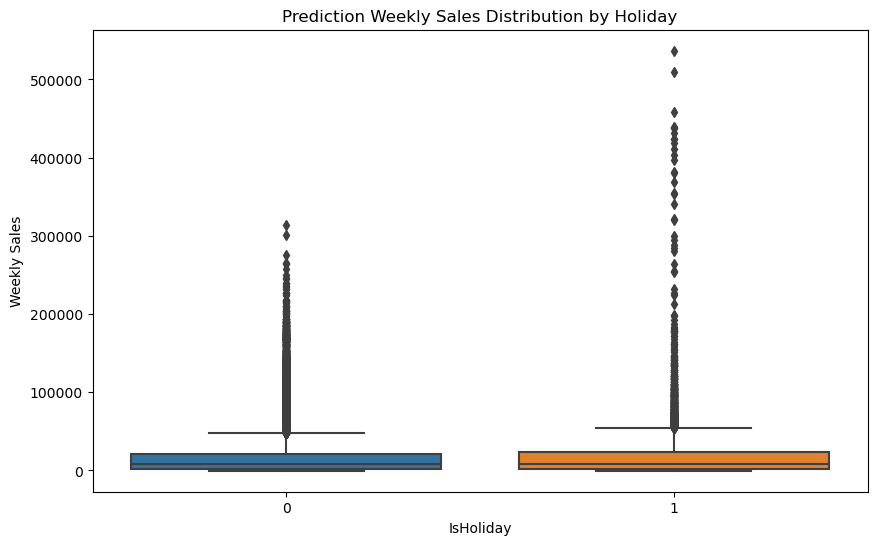

In [60]:
# Visualize the effect of holidays on weekly sales
plt.figure(figsize=(10,6))
sns.boxplot(data=resultpred, x='IsHoliday', y='Weekly_Sales')
plt.title('Prediction Weekly Sales Distribution by Holiday')
plt.xlabel('IsHoliday')
plt.ylabel('Weekly Sales')
plt.show()

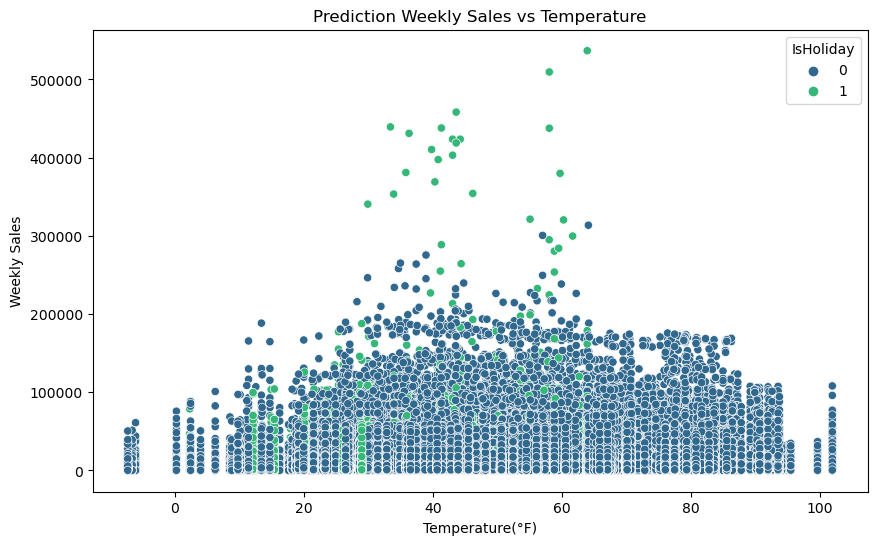

In [61]:
#Relationship between Weekly Sales and Temperature
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_test, x='Temperature', y='Weekly_Sales', hue='IsHoliday', palette='viridis')
plt.title('Prediction Weekly Sales vs Temperature')
plt.xlabel('Temperature(°F)')
plt.ylabel('Weekly Sales')
plt.show()

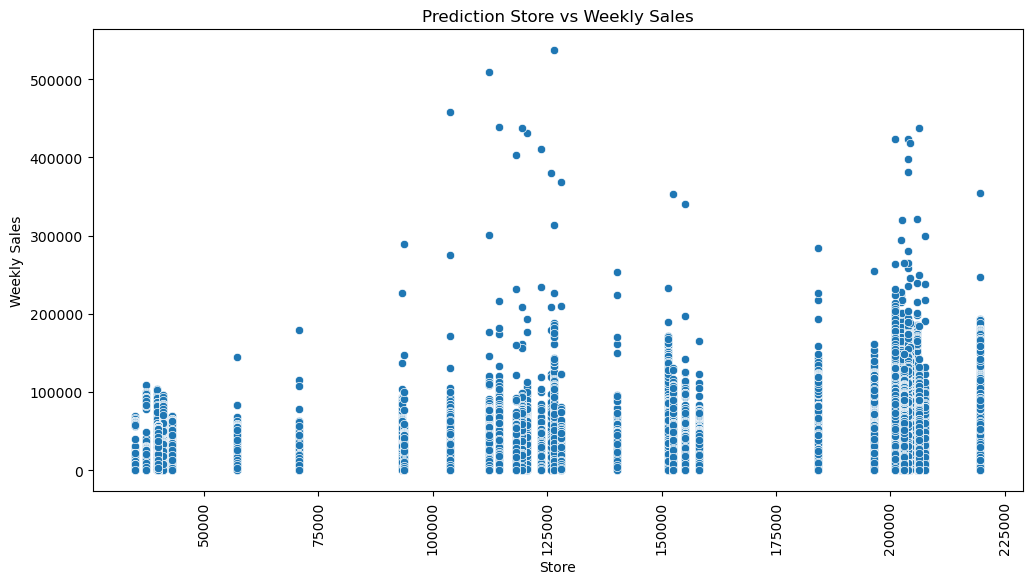

In [62]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_test, x='Size', y='Weekly_Sales')

plt.title('Prediction Store vs Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()


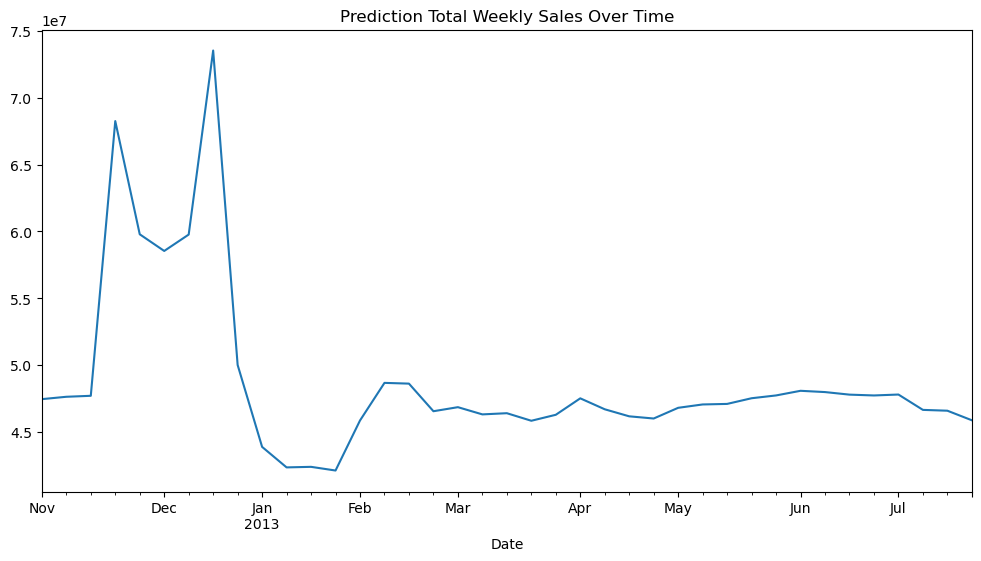

In [63]:
predsales_trend = df_test.groupby('Date')['Weekly_Sales'].sum()
predsales_trend.plot(figsize=(12, 6), title='Prediction Total Weekly Sales Over Time')
plt.show()

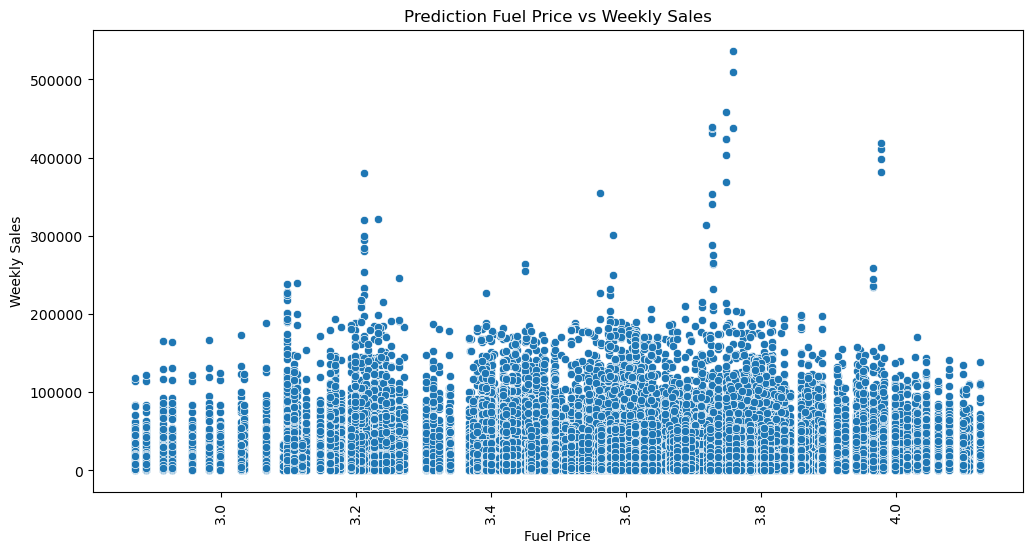

In [64]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_test, x='Fuel_Price', y='Weekly_Sales')

plt.title('Prediction Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()


#### 2-3 key insights and recommendations for stakeholders.

1. Impact of Holidays on Weekly Sales
Insight:

Analysis reveals that IsHoliday weeks significantly influence weekly sales, often showing higher sales compared to regular weeks.
This trend is consistent across stores and departments, with notable spikes during major holiday weeks like Thanksgiving or Christmas.
Recommendation:

Plan strategic promotions and inventory management during holiday periods.
Increase stock levels for high-demand products in key departments during holiday weeks.
Introduce holiday-specific discounts or promotions to maximize sales and attract customers.
Focus marketing campaigns on stores with larger historical sales spikes during holidays to optimize ROI.

2. Store Size and Regional Economic Factors Affect Sales
Insight:

Stores with larger Size generally show higher sales volumes, but they are also more sensitive to regional economic factors like CPI (Consumer Price Index) and Unemployment.
Sales are lower in areas with high unemployment or inflation, even for larger stores.
Recommendation:

Tailor store-level strategies based on local economic conditions.
For stores in regions with high unemployment, consider offering price-sensitive promotions or discounts to encourage purchases.
Introduce smaller package sizes or budget-friendly options in economically sensitive areas.

3. Weather and Fuel Prices Affect Shopping Patterns Insight:

Warmer temperatures (Temperature) are associated with higher sales, especially in seasonal product categories, while fluctuating Fuel_Price impacts overall foot traffic and sales.
Recommendation:

Optimize product offerings and marketing campaigns based on seasonal trends and fuel prices.
For regions expecting warmer weather, promote summer-related items.
For periods of high fuel prices, explore offering online delivery or incentivizing local shopping with discounts.
